# Option Strategies and Position Equivalencies

In [4]:
# Import all relevant packages 
import numpy as np 
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from scipy.stats import norm
%matplotlib inline

from IPython.display import HTML

In [ ]:
# used to hide the code afterwards 
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

### Some lines of code that will help visualize the payoff of strategies 

In [51]:
def call(strike, premium_call):
    price = np.arange(110,230,1) # the stock price at expiration date
    # the payoff of Long Call position: max(S-X,0) where we include the premium here
    
    payoff_long_call = [max(0, (i - strike)) - premium_call for i in price]
    payoff_short_call = [min(0, (strike - i)) + premium_call for i in price]
    
    fig, (ax1, ax2) = plt.subplots(ncols=2, sharex=False, sharey=False,figsize=(15,5))
    
    plt.style.use('dark_background')
    ax1.plot(price, payoff_long_call, label = 'Long Call',linewidth=3)
    ax1.plot(price, payoff_short_call, label = 'Short Call',linewidth=3)
    
    # get line at origin
    ax1.axhline(linewidth=2, color='b')
    ax1.legend(fontsize = 12)
    ax1.set_title('Long & Short Call Payoff',fontsize = 12, color = 'w')
    ax1.grid(True,linewidth=0.2)
    ax1.set_xlabel('Price of Underlying at Expiry', fontsize = 12)
    ax1.set_ylabel('Payoff',fontsize = 12)
    bbox_props1 = dict(boxstyle="Darrow,pad=0.1", fc="b", ec="b")
    bbox_props2 = dict(boxstyle="Darrow,pad=0.1", fc="g", ec="g")
    bbox_props3 = dict(boxstyle="Darrow,pad=0.1", fc="none", ec="y")
    ax1.text(strike - 3.5, -20, "Out of the Money (OTM)", ha="right", va="center", 
            size=12,
            bbox=bbox_props1)
    ax1.text(strike + 3, -20, "In the Money (ITM)", ha="left", va="center", color="w",
            size=12,
            bbox=bbox_props2)
    ax1.text(strike, -25, "ATM", ha="center", va="top", rotation=90,
            size=12,
            bbox=bbox_props3)
# define distribution 
    x = np.linspace(120,220,1000)
    y = norm.pdf(x, loc=170, scale=15)    # pass the mean and standard deviation as loc and scale
    ax2.plot(x,y)
    ax2.fill_between(x,y, where = x <=strike, color='r') 
    ax2.set_title('Return Distribution associated with the underlying',fontsize = 12, color = 'w')
    ax2.set_xlabel('Price of Underlying at Expiry', fontsize = 12)
    ax2.set_ylabel('Probability',fontsize = 12)

In [52]:
def put(strike, premium_put): 
    price = np.arange(110,230,1) # the stock price at expiration date
    # the payoff of Long Put position: max(X-S,0) where we include the premium here

    # payoff_long_put = [max(0, (strike - i)) - premium for i in price]
    payoff_long_put = [max(0, (strike - i)) - premium_put for i in price]
    payoff_short_put = [min(0, (i - strike)) + premium_put for i in price]

    fig, (ax1, ax2) = plt.subplots(ncols=2, sharex=False, sharey=False,figsize=(15,5))
    
    plt.style.use('dark_background')
    ax1.plot(price, payoff_long_put, label = 'Long Put',linewidth=3)
    ax1.plot(price, payoff_short_put, label = 'Short Put',linewidth=3)
    
    # get line at origin
    ax1.axhline(linewidth=2, color='b')
    ax1.legend(fontsize = 12)
    ax1.set_title('Long & Short Put Payoff',fontsize = 12, color = 'w')
    ax1.grid(True,linewidth=0.2)
    ax1.set_xlabel('Price of Underlying at Expiry', fontsize = 12)
    ax1.set_ylabel('Payoff',fontsize = 12)
    bbox_props1 = dict(boxstyle="Darrow,pad=0.1", fc="b", ec="b")
    bbox_props2 = dict(boxstyle="Darrow,pad=0.1", fc="g", ec="g")
    bbox_props3 = dict(boxstyle="Darrow,pad=0.1", fc="none", ec="y")
    ax1.text(strike - 3, -20, "In the Money (ITM)", ha="right", va="center", 
            size=12,
            bbox=bbox_props1)
    ax1.text(strike + 3, -20, "Out of the Money (OTM)", ha="left", va="center", color="w",
            size=12,
            bbox=bbox_props2)
    ax1.text(strike, -25, "ATM", ha="center", va="top", rotation=90,
            size=12,
            bbox=bbox_props3)
# define distribution 
    x = np.linspace(120,220,1000)
    y = norm.pdf(x, loc=170, scale=15)    # pass the mean and standard deviation as loc and scale
    ax2.plot(x,y)
    ax2.fill_between(x,y, where = x >=strike, color='r') 
    ax2.set_title('Return Distribution associated with the underlying',fontsize = 12, color = 'w')
    ax2.set_xlabel('Price of Underlying at Expiry', fontsize = 12)
    ax2.set_ylabel('Probability',fontsize = 12)

In [79]:
def synthetic_long_underlying(strike_atm, premium_atm, underlying):
    price = np.arange(110,230,1)
    payoff_long_call = [max(0, (i - strike_atm)) - premium_atm for i in price]
    payoff_short_put = [min(0, (i - strike_atm)) + premium_atm for i in price]
    payoff = np.sum([payoff_long_call, payoff_short_put], axis=0)
    #
    payoff_long_stock = [i - underlying for i in price]
    
    plt.style.use('dark_background')
    plt.figure(figsize=(12,7))
    plt.plot(price, payoff_long_call, label = 'Long Call',linewidth=1)
    plt.plot(price, payoff_short_put, label = 'Short Put',linewidth=1)
    plt.plot(price, payoff_long_stock, label = 'Long Underlying',linewidth =1)
    
    plt.plot(price, payoff, label = 'Synthetic Long', color='r', linewidth=5, linestyle='dashed')
    plt.axhline(linewidth=2, color='b')
    plt.legend(fontsize = 12)
    plt.title('Synthethic Long Asset',fontsize = 12, color = 'w')
    plt.grid(True,linewidth=0.2)
    plt.xlabel('Price of Underlying at Expiry', fontsize = 12)
    plt.ylabel('Payoff',fontsize = 12)

In [80]:
def synthetic_short_underlying(strike_atm, premium_atm, underlying):
    price = np.arange(110,230,1)
    payoff_short_call = [min(0, (strike_atm - i)) + premium_atm for i in price]
    payoff_long_put = [max(0, (strike_atm - i)) - premium_atm for i in price]
    payoff = np.sum([payoff_long_put, payoff_short_call], axis=0)
    #
    payoff_short_stock = [-i + underlying for i in price]
    
    plt.style.use('dark_background')
    plt.figure(figsize=(12,7))
    plt.plot(price, payoff_long_put, label = 'Long Put',linewidth=1)
    plt.plot(price, payoff_short_call, label = 'Short Call',linewidth=1)
    plt.plot(price, payoff_short_stock, label = 'Short Underlying',linewidth =1)
    
    plt.plot(price, payoff, label = 'Synthetic Long', color='r', linewidth=5, linestyle='dashed')
    plt.axhline(linewidth=2, color='b')
    plt.legend(fontsize = 12)
    plt.title('Synthethic Long Asset',fontsize = 12, color = 'w')
    plt.grid(True,linewidth=0.2)
    plt.xlabel('Price of Underlying at Expiry', fontsize = 12)
    plt.ylabel('Payoff',fontsize = 12)

In [81]:
def synthetic_put(strike_atm, premium_atm, underlying):
    price = np.arange(110,230,1)
    payoff_long_call = [max(0, (i - strike_atm)) - premium_atm for i in price]
    payoff_short_stock = [-i + underlying for i in price]
    payoff = np.sum([payoff_long_call, payoff_short_stock], axis=0)
    #
    
    
    plt.style.use('dark_background')
    plt.figure(figsize=(12,7))
    plt.plot(price, payoff_long_call, label = 'Long Call',linewidth=1)
    plt.plot(price, payoff_short_stock, label = 'Underlying',linewidth =1)
    plt.plot(price, payoff, label = 'Synthetic Put',color='r', linewidth=5, linestyle='dashed')
    
    
    plt.axhline(linewidth=2, color='b')
    plt.legend(fontsize = 12)
    plt.title('Synthethic Long Asset',fontsize = 12, color = 'w')
    plt.grid(True,linewidth=0.2)
    plt.xlabel('Price of Underlying at Expiry', fontsize = 12)
    plt.ylabel('Payoff',fontsize = 12)

In [57]:
def synthetic_call(strike_atm, premium_atm, underlying):
    price = np.arange(110,230,1)
    payoff_long_put = [max(0, (strike_atm - i)) - premium_atm for i in price]
    payoff_long_stock = [i - underlying for i in price]
    payoff = np.sum([payoff_long_put, payoff_long_stock], axis=0)
    #
    
    
    plt.style.use('dark_background')
    plt.figure(figsize=(12,7))
    plt.plot(price, payoff_long_put, label = 'Long Put',linewidth=1)
    plt.plot(price, payoff_long_stock, label = 'Underlying',linewidth =1)
    plt.plot(price, payoff, label = 'Synthetic Call',color='r', linewidth=5, linestyle='dashed')
    
    
    plt.axhline(linewidth=2, color='b')
    plt.legend(fontsize = 12)
    plt.title('Synthethic Long Asset',fontsize = 12, color = 'w')
    plt.grid(True,linewidth=0.2)
    plt.xlabel('Price of Underlying at Expiry', fontsize = 12)
    plt.ylabel('Payoff',fontsize = 12)

In [59]:
def butterfly(strike_call_itm, strike_call_otm, strike_atm, premium_itm, premium_otm, premium_atm):
    price = np.arange(110,230,1)
    # payoff for the long ITM call position (inlcude premium directly)
    payoff_itm_long = [max(- premium_itm, i - strike_call_itm - premium_itm) for i in price]
    # payoff for the long OTM call position
    payoff_otm_long = [max(- premium_otm, i-strike_call_otm-premium_otm) for i in price]
    # payoff for the 2 short ATM call position
    payoff_atm_short = [min(2*premium_atm, -2*(i-strike_atm-premium_atm)) for i in price]
    # payoff for Butterfly Spread Strategy
    payoff = np.sum([payoff_itm_long, payoff_otm_long, payoff_atm_short], axis=0)
     
    plt.style.use('dark_background')
    fig, (ax1, ax2) = plt.subplots(ncols=2, sharex=False, sharey=False,figsize=(15,5))

    ax1.plot(price, payoff_itm_long, label = 'Long ITM Call',linewidth=1)
    ax1.plot(price, payoff_otm_long, label = 'Long OTM Call',linewidth=1)
    ax1.plot(price, payoff_atm_short, label = 'Short 2 ATM Call',linewidth=1)
    ax1.plot(price, payoff, label = 'Long Butterfly',linewidth=5, linestyle='dashed',color="r")

    ax1.axhline(linewidth=2, color='b')

    ax1.axvline(x=strike_call_itm,linewidth=0.5, color='g')
    ax1.axvline(x=strike_call_otm,linewidth=0.5, color='g')
    ax1.axvline(x=strike_atm,linewidth=0.5, color='g')

    ax1.legend(fontsize = 8) #loc=3)
    ax1.set_xlabel('Price of underlying at Expiry',fontsize = 12)
    ax1.set_ylabel('Payoff',fontsize = 12)
    ax1.set_title('Long Butterfly Payoff',fontsize = 12)
    ax1.grid(True,linewidth=0.2)
# define distribution 
    x = np.linspace(110,230,1000)
    y = norm.pdf(x, loc=170, scale=15)    # pass the mean and standard deviation as loc and scale
    ax2.plot(x,y)
    ax2.fill_between(x,y, where = x <=strike_call_itm, color='r') 
    ax2.fill_between(x,y, where = x >=strike_call_otm, color='r')
    ax2.set_title('Return Distribution associated with the underlying',fontsize = 12, color = 'w')
    ax2.set_xlabel('Price of Underlying at expiry', fontsize = 12)
    ax2.set_ylabel('Probability',fontsize = 12)

In [60]:
def synthetic_forward(strike_atm, premium_call, premium_put): 
    price = np.arange(110,230,1) # the stock price at expiration date
    call_put_flag = -1
# payoff for the long call
    payoff_long_call = [max(0, (i - strike_atm))-premium_call for i in price]
# payoff for the short put
    payoff_short_put = [min(0, (i - strike_atm))-premium_put*call_put_flag for i in price]
# combined payoff
    payoff = np.sum([payoff_long_call, payoff_short_put], axis=0)
    
    plt.style.use('dark_background')
    fig, (ax1, ax2) = plt.subplots(ncols=2, sharex=False, sharey=False,figsize=(15,5))
 
    ax1.plot(price, payoff_long_call, label = 'Long Call',linewidth=1)
    ax1.plot(price, payoff_short_put, label = 'Short put',linewidth=1)
    ax1.plot(price, payoff, label = 'Risk Reversal',linewidth=5, linestyle='dashed',color="r")
    ax1.axhline(linewidth=2, color='b')
    ax1.legend(fontsize = 12)
    ax1.set_xlabel('Price of Underlying at Expiry',fontsize = 12)
    ax1.set_ylabel('Payoff',fontsize = 12)
    ax1.set_title('Synthetic Forward Payoff',fontsize = 12)
    ax1.grid(True,linewidth=0.2)   
    ax1.axvline(x=strike_atm,linewidth=0.5, color='g')
# define distribution 
    x = np.linspace(110,230,1000)
    y = norm.pdf(x, loc=170, scale=15)    # pass the mean and standard deviation as loc and scale
    ax2.plot(x,y)
    ax2.fill_between (x,y, where = (x <= strike_atm) & (x >=strike_atm), color='r') 
    ax2.fill_between(x,y, where = (x >=strike_atm) & (x<=strike_atm), color='r')
    ax2.set_title('Return Distribution associated with the underlying',fontsize = 12, color = 'w')
    ax2.set_xlabel('Price of Underlying at expiry', fontsize = 12)
    ax2.set_ylabel('Probability',fontsize = 12)

In [61]:
def risk_reversal(strike_call_otm, strike_put_otm,premium_otm): 
    price = np.arange(110,230,1) # the stock price at expiration date
    call_put_flag = -1
# payoff for the long call
    payoff_long_call = [max(0, (i - strike_call_otm))-premium_otm for i in price]
# payoff for the short put
    payoff_short_put = [min(0, (i - strike_put_otm))-premium_otm*call_put_flag for i in price]
# combined payoff
    payoff = np.sum([payoff_long_call, payoff_short_put], axis=0)
    
    plt.style.use('dark_background')
    fig, (ax1, ax2) = plt.subplots(ncols=2, sharex=False, sharey=False,figsize=(15,5))
 
    ax1.plot(price, payoff_long_call, label = 'Long Call',linewidth=1)
    ax1.plot(price, payoff_short_put, label = 'Short put',linewidth=1)
    ax1.plot(price, payoff, label = 'Synthetic Forward',linewidth=5, linestyle='dashed',color="r")
    ax1.axhline(linewidth=2, color='b')
    ax1.legend(fontsize = 12)
    ax1.set_xlabel('Price of Underlying at Expiry',fontsize = 12)
    ax1.set_ylabel('Payoff',fontsize = 12)
    ax1.set_title('Risk Reversal Payoff',fontsize = 12)
    ax1.grid(True,linewidth=0.2)   
    ax1.axvline(x=strike_call_otm,linewidth=0.5, color='g')
    ax1.axvline(x=strike_put_otm,linewidth=0.5, color='g')
# define distribution 
    x = np.linspace(110,230,1000)
    y = norm.pdf(x, loc=170, scale=15)    # pass the mean and standard deviation as loc and scale
    ax2.plot(x,y)
    ax2.fill_between (x,y, where = (x <= strike_call_otm) & (x >=strike_put_otm), color='r') 
    ax2.fill_between(x,y, where = (x >=strike_put_otm) & (x<=strike_call_otm), color='r')
    ax2.set_title('Return Distribution associated with the underlying',fontsize = 12, color = 'w')
    ax2.set_xlabel('Price of Underlying at expiry', fontsize = 12)
    ax2.set_ylabel('Probability',fontsize = 12)

In [90]:
def covered_call(strike_call_otm, premium_otm, underlying):
    price = np.arange(110,230,1) # the stock price at expiration date
    # the payoff of short call position
    payoff_short_call = [min(0, - (i - strike_call_otm)) + premium_otm for i in price]
    # the payoff of long stock postion
    payoff_long_stock = [i - underlying for i in price]
    # the payoff of covered call
    payoff_covered_call = np.sum([payoff_short_call, payoff_long_stock], axis=0)
    
    max_profit = (strike_call_otm - underlying) + premium_otm
    
    fig, (ax1, ax2) = plt.subplots(ncols=2, sharex=False, sharey=False,figsize=(15,5))
    
    plt.style.use('dark_background')
    
    ax1.plot(price, payoff_short_call, label = 'Short Call', linewidth=1)
    ax1.plot(price, payoff_long_stock, label = 'Long Underlying', linewidth=1)
    ax1.plot(price, payoff_covered_call, label = 'Covered Call', color='r', linewidth=5, linestyle='dashed')

    ax1.axhline(y=max_profit, xmin=0.0, xmax=1.0, color='w',linewidth=0.5)
    ax1.axhline(linewidth=2, color='b')
    ax1.legend(fontsize = 12)
    ax1.set_xlabel('Price of Underlying at Expiry', fontsize = 12)
    ax1.set_ylabel('Payoff',fontsize = 12)
    ax1.set_title('Covered Call Strategy Payoff at Expiration', fontsize = 12)
    ax1.grid(True,linewidth=0.2)
# define distribution 
    x = np.linspace(120,220,1000)
    y = norm.pdf(x, loc=170, scale=15)    # pass the mean and standard deviation as loc and scale
    ax2.plot(x,y)
    ax2.fill_between(x,y, where = x >=strike_call_otm, color='r') 
    ax2.set_title('Return Distribution associated with the underlying',fontsize = 12, color = 'w')
    ax2.set_xlabel('Price of Underlying at Expiry', fontsize = 12)
    ax2.set_ylabel('Probability',fontsize = 12)
    
    return("Someone writing a call with a strike of {} gives up all returns above above the strike price").format(strike_call_otm)


In [63]:
def protective_put(strike_put_otm, premium_otm, underlying):
    price = np.arange(110,230,1) # the stock price at expiration date
    # the payoff of short call position
    payoff_long_put = [max(0, (strike_put_otm - i)) - premium_otm for i in price]
    # the payoff of long stock postion
    payoff_long_stock = [i - underlying for i in price]
    # the payoff of covered call
    payoff_covered_call = np.sum([payoff_long_put, payoff_long_stock], axis=0)
    
    fig, (ax1, ax2) = plt.subplots(ncols=2, sharex=False, sharey=False,figsize=(15,5))
    
    plt.style.use('dark_background')
    
    ax1.plot(price, payoff_long_put, label = 'Short Call', linewidth=1)
    ax1.plot(price, payoff_long_stock, label = 'Long Underlying', linewidth=1)
    ax1.plot(price, payoff_covered_call, label = 'Covered Call', color='r', linewidth=5, linestyle='dashed')

    ax1.axhline(linewidth=2, color='b')
    ax1.legend(fontsize = 12)
    ax1.set_xlabel('Price of Underlying at Expiry', fontsize = 12)
    ax1.set_ylabel('Payoff',fontsize = 12)
    ax1.set_title('Protective Put Strategy Payoff at Expiration', fontsize = 12)
    ax1.grid(True,linewidth=0.2)
# define distribution 
    x = np.linspace(120,220,1000)
    y = norm.pdf(x, loc=170, scale=15)    # pass the mean and standard deviation as loc and scale
    ax2.plot(x,y)
    ax2.fill_between(x,y, where = x <=strike_put_otm, color='r') 
    ax2.set_title('Return Distribution associated with the underlying',fontsize = 12, color = 'w')
    ax2.set_xlabel('Price of Underlying at Expiry', fontsize = 12)
    ax2.set_ylabel('Probability',fontsize = 12)

In [64]:
def collar(strike_call_otm, strike_put_otm, premium_otm, underlying): 
    price = np.arange(110,230,1) # the stock price at expiration date
    call_put_flag = -1
# payoff for the long call
    payoff_short_call = [min(0, (strike_call_otm - i)) + premium_otm for i in price]
# payoff for the long put
    payoff_long_put = [max(0, (strike_put_otm - i)) - premium_otm for i in price]
# payoff underlying    
    payoff_long_stock = [i - underlying for i in price]
# combined payoff
    payoff = np.sum([payoff_short_call, payoff_long_put, payoff_long_stock], axis=0)
    
    plt.style.use('dark_background')
    fig, (ax1, ax2) = plt.subplots(ncols=2, sharex=False, sharey=False,figsize=(15,5))
 
    ax1.plot(price, payoff_short_call, label = 'Short Call',linewidth=1)
    ax1.plot(price, payoff_long_put, label = 'Long Put',linewidth=1)
    ax1.plot(price, payoff_long_stock, label = 'Long Underlying',linewidth=1)
    ax1.plot(price, payoff, label = 'Collar',linewidth=5, linestyle='dashed',color='r')
    ax1.axhline(linewidth=2, color='b')
    ax1.legend(fontsize = 12)
    ax1.set_xlabel('Price of Underlying at Expiry',fontsize = 12)
    ax1.set_ylabel('Payoff',fontsize = 12)
    ax1.set_title('Collar Payoff',fontsize = 12)
    ax1.grid(True,linewidth=0.2)   
    ax1.axvline(x=strike_call_otm,linewidth=0.5, color='g')
    ax1.axvline(x=strike_put_otm,linewidth=0.5, color='g')
# define distribution 
    x = np.linspace(110,230,1000)
    y = norm.pdf(x, loc=170, scale=15)    # pass the mean and standard deviation as loc and scale
    ax2.plot(x,y)
    ax2.fill_between (x,y, where = x >= strike_call_otm, color='r') 
    ax2.fill_between(x,y, where = x <=strike_put_otm, color='r')
    ax2.set_title('Return Distribution associated with the underlying',fontsize = 12, color = 'w')
    ax2.set_xlabel('Price of Underlying at expiry', fontsize = 12)
    ax2.set_ylabel('Probability',fontsize = 12)

In [65]:
def bull_spread(strike_call_itm, strike_call_otm, premium_itm, premium_otm):
    price = np.arange(110,230,1) 
    # long call with lower strike
    payoff_long_call = [max(0, (i - strike_call_itm)) - premium_itm for i in price]
    # short call with higher strike
    payoff_short_call = [min(premium_otm, -(i-strike_call_otm-premium_otm)) for i in price]
    payoff = np.sum([payoff_long_call, payoff_short_call], axis=0)
    
    plt.style.use('dark_background')
    fig, (ax1, ax2) = plt.subplots(ncols=2, sharex=False, sharey=False,figsize=(15,5))
    ax1.plot(price, payoff_long_call, label = 'Long Call',linewidth=1)   
    ax1.plot(price, payoff_short_call, label = 'Short Call',linewidth=1)
    ax1.plot(price, payoff, label = 'Bull Call Spread',linewidth=5, linestyle='dashed',color='r')
    
    ax1.legend(fontsize = 12)
    ax1.set_xlabel('Price of Underlying at Expiry',fontsize = 12)
    ax1.set_xlabel('Payoff',fontsize = 12)
    ax1.set_title('Bull Call Spread Payoff at Expiration',fontsize = 12)
    ax1.grid(True,linewidth=0.2)
    ax1.axhline(linewidth=2, color='b')
    ax1.legend(fontsize = 12)   
    ax1.axvline(x=strike_call_itm,linewidth=0.5, color='g')
    ax1.axvline(x=strike_call_otm,linewidth=0.5, color='g')
# define distribution 
    x = np.linspace(110,230,1000)
    y = norm.pdf(x, loc=170, scale=15)    # pass the mean and standard deviation as loc and scale
    ax2.plot(x,y)
    ax2.fill_between (x,y, where = x <= strike_call_itm, color='r') 
    ax2.fill_between(x,y, where = x >=strike_call_otm, color='r')
    ax2.set_title('Return Distribution associated with the underlying',fontsize = 12, color = 'w')
    ax2.set_xlabel('Price of Underlying at expiry', fontsize = 12)
    ax2.set_ylabel('Probability',fontsize = 12)

In [66]:
def bull_spread_put(strike_put_itm, strike_put_otm, premium_itm, premium_otm):
    price = np.arange(110,230,1) 
    call_put_flag = -1
    # short put with higher strike
    payoff_short_put = [min(0, (i - strike_put_itm)) + premium_itm for i in price]
    # long put with lower strike
    payoff_long_put = [max(0, (strike_put_otm - i)) - premium_otm for i in price]

    payoff = np.sum([payoff_long_put, payoff_short_put], axis=0)
    
    plt.style.use('dark_background')
    fig, (ax1, ax2) = plt.subplots(ncols=2, sharex=False, sharey=False,figsize=(15,5))
    ax1.plot(price, payoff_long_put, label = 'Long Put',linewidth=1)   
    ax1.plot(price, payoff_short_put, label = 'Short Put',linewidth=1)
    ax1.plot(price, payoff, label = 'Bull Put Spread',linewidth=5, linestyle='dashed',color='r',)
    
    ax1.legend(fontsize = 12)
    ax1.set_xlabel('Price of Underlying at Expiry',fontsize = 12)
    ax1.set_xlabel('Payoff',fontsize = 12)
    ax1.set_title('Bull Put Spread Payoff at Expiration',fontsize = 12)
    ax1.grid(True,linewidth=0.2)
    ax1.axhline(linewidth=2, color='b')
    ax1.legend(fontsize = 12)   
    ax1.axvline(x=strike_put_itm,linewidth=0.5, color='g')
    ax1.axvline(x=strike_put_otm,linewidth=0.5, color='g')
# define distribution 
    x = np.linspace(110,230,1000)
    y = norm.pdf(x, loc=170, scale=15)    # pass the mean and standard deviation as loc and scale
    ax2.plot(x,y)
    ax2.fill_between (x,y, where = x >= strike_put_itm, color='r') 
    ax2.fill_between(x,y, where = x <=strike_put_otm, color='r')
    ax2.set_title('Return Distribution associated with the underlying',fontsize = 12, color = 'w')
    ax2.set_xlabel('Price of Underlying at expiry', fontsize = 12)
    ax2.set_ylabel('Probability',fontsize = 12)

In [67]:
def bear_spread(strike_put_itm, strike_put_otm, premium_itm, premium_otm):
    price = np.arange(110,230,1) 
    call_put_flag = -1
    # long put with higher strike
    payoff_long_put = [max(0, (strike_put_itm - i)) - premium_itm for i in price]
    # short put with lower strike
    payoff_short_put = [min(0, (i - strike_put_otm))-premium_otm*call_put_flag for i in price]
    
    payoff_short_call = [min(premium_otm, -(i-strike_put_otm-premium_otm)) for i in price]
    payoff = np.sum([payoff_long_put, payoff_short_put], axis=0)
    
    plt.style.use('dark_background')
    fig, (ax1, ax2) = plt.subplots(ncols=2, sharex=False, sharey=False,figsize=(15,5))
    ax1.plot(price, payoff_long_put, label = 'Long Put',linewidth=1)   
    ax1.plot(price, payoff_short_put, label = 'Short Put',linewidth=1)
    ax1.plot(price, payoff, label = 'Bear Put Spread',linewidth=5, linestyle='dashed',color='r')
    
    ax1.legend(fontsize = 12)
    ax1.set_xlabel('Price of Underlying at Expiry',fontsize = 12)
    ax1.set_xlabel('Payoff',fontsize = 12)
    ax1.set_title('Bear Put Spread Payoff at Expiration',fontsize = 12)
    ax1.grid(True,linewidth=0.2)
    ax1.axhline(linewidth=2, color='b')
    ax1.legend(fontsize = 12)   
    ax1.axvline(x=strike_put_itm,linewidth=0.5, color='g')
    ax1.axvline(x=strike_put_otm,linewidth=0.5, color='g')
# define distribution 
    x = np.linspace(110,230,1000)
    y = norm.pdf(x, loc=170, scale=15)    # pass the mean and standard deviation as loc and scale
    ax2.plot(x,y)
    ax2.fill_between (x,y, where = x >= strike_put_itm, color='r') 
    ax2.fill_between(x,y, where = x <=strike_put_otm, color='r')
    ax2.set_title('Return Distribution associated with the underlying',fontsize = 12, color = 'w')
    ax2.set_xlabel('Price of Underlying at expiry', fontsize = 12)
    ax2.set_ylabel('Probability',fontsize = 12)

In [68]:
def bear_spread_call(strike_call_itm, strike_call_otm, premium_itm, premium_otm):
    price = np.arange(110,230,1) 
    # short call with lower strike
    payoff_short_call = [min(premium_itm, - (i- strike_call_itm - premium_itm)) for i in price]
    # long call with higher strike
    payoff_long_call = [max(0, (i - strike_call_otm)) - premium_otm for i in price]
    payoff = np.sum([payoff_long_call, payoff_short_call], axis=0)
    
    plt.style.use('dark_background')
    fig, (ax1, ax2) = plt.subplots(ncols=2, sharex=False, sharey=False,figsize=(15,5))
    ax1.plot(price, payoff_long_call, label = 'Long Call',linewidth=1)   
    ax1.plot(price, payoff_short_call, label = 'Short Call',linewidth=1)
    ax1.plot(price, payoff, label = 'Bear Call Spread',linewidth=5, linestyle='dashed',color='r')
    
    ax1.legend(fontsize = 12)
    ax1.set_xlabel('Price of Underlying at Expiry',fontsize = 12)
    ax1.set_xlabel('Payoff',fontsize = 12)
    ax1.set_title('Bear Call Spread Payoff at Expiration',fontsize = 12)
    ax1.grid(True,linewidth=0.2)
    ax1.axhline(linewidth=2, color='b')
    ax1.legend(fontsize = 12)   
    ax1.axvline(x=strike_call_itm,linewidth=0.5, color='g')
    ax1.axvline(x=strike_call_otm,linewidth=0.5, color='g')
# define distribution 
    x = np.linspace(110,230,1000)
    y = norm.pdf(x, loc=170, scale=15)    # pass the mean and standard deviation as loc and scale
    ax2.plot(x,y)
    ax2.fill_between (x,y, where = x <= strike_call_itm, color='r') 
    ax2.fill_between(x,y, where = x >=strike_call_otm, color='r')
    ax2.set_title('Return Distribution associated with the underlying',fontsize = 12, color = 'w')
    ax2.set_xlabel('Price of Underlying at expiry', fontsize = 12)
    ax2.set_ylabel('Probability',fontsize = 12)

In [69]:
def straddle(strike_atm, premium_atm):
    price = np.arange(110,230,1)
    # payoff for the long call
    payoff_long_call = [max(-premium_atm, i-strike_atm-premium_atm) for i in price]
    # payoff for the long put
    payoff_long_put = [max(-premium_atm, strike_atm-i-premium_atm) for i in price]
    payoff = np.sum([payoff_long_call, payoff_long_put], axis=0)
    plt.figure(figsize=(12,7))
    plt.plot(price, payoff_long_call, label = 'Long Call')
    plt.plot(price, payoff_long_put, label = 'long put')
    plt.axhline(linewidth=2, color='b')
    plt.plot(price, payoff, label = 'Long Straddle',linewidth=6, linestyle='dashed',color='r')
    plt.legend(fontsize = 12)
    plt.xlabel('Price of Underlying at Expiry',fontsize = 12)
    plt.ylabel('Payoff',fontsize = 12)
    plt.title('Long Straddle Payoff',fontsize = 12)
    plt.grid(True,linewidth=0.2)

In [70]:
def strangle(strike_call_otm, strike_put_otm, premium_call, premium_put):
    price = np.arange(110,230,1)
    # payoff for the long call
    payoff_long_call = [max(-premium_put, i-strike_call_otm-premium_call) for i in price]
    # payoff for the long put
    payoff_long_put = [max(-premium_call, strike_put_otm-i-premium_put) for i in price]
    payoff = np.sum([payoff_long_call, payoff_long_put], axis=0)
    plt.figure(figsize=(12,7))
    plt.plot(price, payoff_long_call, label = 'Long Call')
    plt.plot(price, payoff_long_put, label = 'long put')
    plt.axhline(linewidth=2, color='b')
    plt.plot(price, payoff, label = 'Long Straddle',linewidth=6, linestyle='dashed',color='r')
    plt.legend(fontsize = 12)
    plt.xlabel('Price of Underlying at Expiry',fontsize = 12)
    plt.ylabel('Payoff',fontsize = 12)
    plt.title('Long Straddle Payoff',fontsize = 12)
    plt.grid(True,linewidth=0.2)

In [72]:
def option_type(*args):
    """
    ################################
    ## option_type(strategy_name) ##
    ################################
    
    Supported strategies: 
    call, 
    put,
    synthetic_forward,
    risk_reversal, 
    collar (short risk_reversal and long underlying), 
    butterfly, 
    protective_put (long put and long underlying),
    covered_call (long underlying and short call),
    bull_spread (two calls),
    bull_spread_put (two puts),
    bear_spread (two puts),
    bear_spread_call (two calls),
    straddle,
    strangle,
    synthetic_long_underlying,
    synthetic_short_underlying
    synthetic_put,
    synthetic_call
    
    
    tbc?
    """
    strike = 170
    for x in args:
        return(interact(x,
                # determine strikes 
                strike = widgets.FloatSlider(value = strike,
                                                   min = 160.0,
                                                   max = 185.0,
                                                   step = 5.0),
                strike_atm = widgets.FloatSlider(value = strike,
                                                   min = 110.0,
                                                   max = 230.0,
                                                   step = 5.0),
                strike_call_otm = widgets.FloatSlider(value = strike + 25,
                                                   min = 110.0,
                                                   max = 230.0,
                                                   step = 5.0),
                strike_put_otm = widgets.FloatSlider(value = strike - 25,
                                                   min = 110.0,
                                                   max = 230.0,
                                                   step = 5.0),
                strike_put_itm = widgets.FloatSlider(value = strike + 25,
                                                   min = 110.0,
                                                   max = 230.0,
                                                   step = 5.0),
                strike_call_itm = widgets.FloatSlider(value = strike - 25,
                                                   min = 110.0,
                                                   max = 230.0,
                                                   step = 5.0),
                underlying = widgets.FloatSlider(value = strike,
                                                   min = 110.0,
                                                   max = 230.0,
                                                   step = 5.0),
                        
                # all premiums needed         
                premium_call = widgets.FloatSlider(value = 8,
                                                   min = 1,
                                                   max = 30,
                                                   step = 0.5),
                premium_put = widgets.FloatSlider(value = 8,
                                                   min = 1,
                                                   max = 30,
                                                   step = 0.5),
                premium_itm = widgets.FloatSlider(value = 25,
                                                   min = 1,
                                                   max = 50,
                                                   step = 0.5),
                premium_atm = widgets.FloatSlider(value = 10,
                                                   min = 1,
                                                   max = 25,
                                                   step = 0.5),
                premium_otm = widgets.FloatSlider(value = 8.5,
                                                   min = 1, 
                                                   max = 20,
                                                   step = 0.5)))

# Finally done 
you can load any supported strategy with the command:   
option_type(strategy_name) 

# Let's start with some basics about options.   

An option gives the holder the right, but not obligation to buy / sell an  amount of a underlying asset at a price that is agreed today at a future date:

- Right vs Obligation - Holder of has the right to decide
- Underlying Asset - Reference stock, currency, bond, swap, another option, commodities, weather, inflation etc.  
- Notional - The amount of shares, currency or bonds 
- Strike - Price you agree to buy / sell the option
- Expiry Date - Point in future for transaction
- Agreed Today - Full transaction details in agreement

[Call option](https://en.wikipedia.org/wiki/Call_option) is a financial contract between two parties, the buyer and the seller of this type of option. 
- The *buyer* has the **right**, but not the obligation, **to buy** an agreed quantity of a particular underlying from the seller of the option at a certain time (the expiration date) for a certain price (the strike price). 
- The *seller* (or "writer") is **obligated to sell** the commodity or financial instrument to the buyer if the buyer so decides. The buyer pays a fee (called a premium) for this right. The term "call" comes from the fact that the owner has the right to "call the stock away" from the seller.    
The buyer is long, and the seller is short the option.    

[Put option](https://en.wikipedia.org/wiki/Put_option) is is a financial contract between two parties, the buyer and the seller of this type of option.  
- The *buyer* has the **right**, but not the obligation, **to sell** an agreed quantity of a particular underlying from the seller of the option at a certain time (the expiration date) for a certain price (the strike price). 
- The *seller* (or "writer") is **obligated to buy** the commodity or financial instrument to the buyer if the buyer so decides. The buyer pays a fee (called a premium) for this right. The term "put" comes from the fact that the owner has the right to "put the underlying up for sale".    
The buyer is long, and the seller is short the option. 
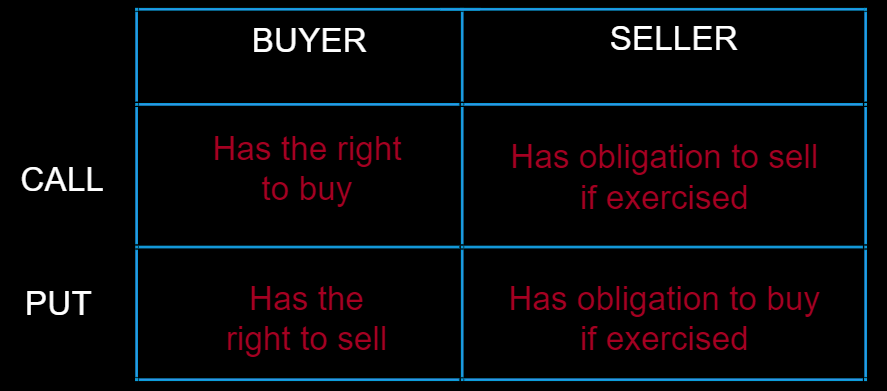



# Call & Put Options    
This section is based mainly on the CFA Level II material. 

Since the buyer has the right, but not the obligation, the buyer will only exercise the option (use the right) iff the the price of the underlying is above the strike price. This means the buyer will make a profit and the call option is said to be [in-the-money](https://en.wikipedia.org/wiki/Moneyness).   
If the underlying is equal to the strike price, the option holder is indifferent between exercising it and not exercising it.  
<mark>At-the-money</mark> option is where the payoff of a call option and a put option intersects. In case of a call option, as the price of the underlying asset moves above the exercise price, the option is said to be in the money. On the other hand, if price of the underlying asset dives below the exercise price, the option is said to be <mark>out-of-the-money</mark>. The <mark>moneyness</mark> of a put option is just opposite to that of a call option i.e. it is in the money when the price of the underlying asset moves below the exercise price, and out of the money when the price of the underlying asset is higher than the exercise price.

The chart on the right hand side below represents the return distribution of the price of the underlying at the option expiration date. Note that this is assuming a normal distribution of logarithmic returns. 

<div class="alert alert-block alert-success">
<b>Tip:</b> Check out the section "Why the natural logarithm is such a natural choice" for an explantion of this. 
</div>  

This is identical to the canonical Black Scholes model, which assumes that the underlying follows a process called Geometirc Brownian motion, which implies a lognormal distribution of returns, meaning the logarithmic return is normally distributed. 

- If you buy a call option, you are not exposed to the part of the return distirbution that lies to the left of the strike, which is the red area under the bell curve.  
- If you buy a put option, you naturally are exposed to the opposite side of the distribution.   

<div class="alert alert-block alert-success">
<b>Tip:</b> Moneyness does not depend on what side of the trade you are on (if you buy or sell the option). As mentioned above, only the buyer of the option has the right to exercise, whereas the seller has the obligation to honor the contract. Therefore, moneyness is always depending on the buyer, who decides whether to exercise or not. 
</div>


In [73]:
option_type(call)

interactive(children=(FloatSlider(value=170.0, description='strike', max=185.0, min=160.0, step=5.0), FloatSli…

<function __main__.call(strike, premium_call)>

In [74]:
option_type(put)

interactive(children=(FloatSlider(value=170.0, description='strike', max=185.0, min=160.0, step=5.0), FloatSli…

<function __main__.put(strike, premium_put)>

# Synthetic Long Positions
Suppose an investor buys a share of common stock at a price of 170. The investor gains if the price goes up, and loses money if the price declines.   
what happens if the investor simulatenously buys a call and writes (sells) a put with the same expiration date and the same exercise price (strike), say at 170? 
- At expiration, a call is worth the greater of zero or the stock price minus the exercise price. $max(0,  S - x)$
- Likewsie, the put is worth the greater of zero or the exercise price minus the stock price.    

Therefore, the combination of options is equivalent to a long position in the stock, which is why it is frequently called a <mark>synthetic long</mark> position. Clearly, the opposite is also possible, which is called a <mark>synthetic short</mark> position (toggle the function below). 

Technically, this position is not exactly identical to a long position. 
- This is due to the fact that with the stock position, you must pay the total amount at the beginning, when you enter the position. 
- Whereas with the option strategy, you must pay the exercise price at expiration.  
Adding a zero coupon bond to the option strategy (at an amount equivalent to what you "saved" by not entering the stock poistion right away), or setting the present value of the exercise price to the stock price would make the two strategies precisely the same.   
This is a simplified explanation of the so called <mark>Put-Call Parity</mark>: 
$ S + p = PV(X) + c$, where $S + p$ is long the stock and long a put, and $ PV(X) + c $ is lending (the zero coupon bond) and a long call.   

In [93]:
option_type(synthetic_long_underlying)

interactive(children=(FloatSlider(value=170.0, description='strike_atm', max=230.0, min=110.0, step=5.0), Floa…

<function __main__.synthetic_long_underlying(strike_atm, premium_atm, underlying)>

Depending on the context, this equation can be rearranged. For example, a call option can be expressed as a position in a stock, financing and a put: 
$c = S - PV(X) + p $. This is also called a synthetic call.   
Likewise, a put options can be expressed as a long call, short the stock and investing the proceeds of the sold stock in a bond: 
$p = c - S + PV(X) $. This is also called a synthetic put.

In [83]:
option_type(synthetic_put)

interactive(children=(FloatSlider(value=170.0, description='strike_atm', max=230.0, min=110.0, step=5.0), Floa…

<function __main__.synthetic_put(strike_atm, premium_atm, underlying)>

A synthetic put positions were an important strategy historically. When the **Chicago Board Option Exchange** opened in 1973, there were exchange traded calls but no puts. Regulators were concerned about approving a financial instrument that benefited from falling prices.  
However, it was easy to create such a position synthetically as is clearly demonstrated with the synthetic put. It took until [1973](http://www.cboe.com/aboutcboe/history) until the CBOE added put options. 

# Covered Calls and Protective Puts  
### Covered Calls 
A covered call is a very common strategy where someone who already owns the underlying, sells a call option. If someone writes a call option without owning the underlying, this is called a **Naked Call**.   
What are the implications of this? 
- the investor owns shares
- has the potential obligation to deliver the shares to the option buyer 
- receives a premium for the willingness to do so    

The general shape of the profit and loss diagramme is the same for covered calls and that of writing a put. However, covered call writing is a very common use of options by individual investors, whereas writing puts is very uncommon. 

#### Investment Objectives of Covered Calls   
1) <mark>Income generation</mark>: The most common motivation for writing covered calls is income generation. The writer of the option can keep the premium, regardless of what happens in the future. This is reflected in the payoff lying above the underlying in the chart below. However, this strategy implies that the writer of the call option is essentially selling part of the return distribution associated with the underlying asset. The largest returns are those to the far right of the return distribution. Someone writing a call with gives up all returns above above the strike price. There is a clear tradeoff between the size of the option premium and the likelihood of exercise of the option. Note that the diagramme below is not a proper option pricer and does not accurately reflect the premium associated with different strike prices.  

2) <mark>Improving on the market</mark>: Consider a portfolio manager who has become overweight in a specific sector and wants to reduce this imbalance. Assume that the asset manager believes the market price will remain relatively stable. By writing in-the-money options, the likelihood of exercise of these options is very high. This is a desirable outcome for two reasons: 
- reduce the overweight in the portfolio  
- gain extra income from the premium received from writing the option  
An option premium consists of two parts: exercise value (what the payoff diagrammes depict), as well as time value. The option value is generally above the exercise value at any given time prior to the expiration date. Someone who writes covered calls to improve on the market is capturing this time value of money, at the expense of giving up part of the return distribution.   
Let's consider a simple numerical example. By convention, the smallest unit for a listed equity option is usually one contract covering 100 shares.  If the portfolio manager holds 5000 shares of a stock, and decides to write (sell) 10 exchange traded options expiring next month with a strike of 165. Therefore, the buyer of the options receives the right to purchase 1000 shares (100 x 10) at the price of 165. If these options cost 16.4 per contract, the seller receives the option premium of $\frac{16.4}{call}*  \frac{100\ shares}{contract} *  10\ contracts = 16.400$.  
Assume the current price of the underlying is 170. I the option is exercised, the shares are effectively sold at $165 + 16.4 = 181.4$. The investor could have simply sold the shares at the original price of 170.  
This specific example results in an extra income of $ 181.4*1000 - 170*1000 = 11.400$.

3) <mark>Target Price Realization</mark>: This is essentially a hybrid of the first two objectives. The strategy consists of writing a call with an exercise price near the target price. If the price fails to rise above the target price, the portfolio manager could write a new call with the same objective in mind. This should not be confused with free money. Instead of selling now and locking in a potential profit, there is a chance that the target price will never be reached and that the stock depreciates. In this case, there are two cases of opportunity costs (losses): the ooportunity loss relative to teh outright sale of the stock, and the opportunity loss if the stock appreciates above the exercise price. 

In [92]:
option_type(covered_call)

interactive(children=(FloatSlider(value=195.0, description='strike_call_otm', max=230.0, min=110.0, step=5.0),…

<function __main__.covered_call(strike_call_otm, premium_otm, underlying)>

#### Profit and Loss of Covered Calls at expiration   
- $S_0$ - stock price when the position is opened
- $S_T$ - stock price at option expiration 
- $X$   - exercise price 
- $c_0$ - call premium received or paid    

The <mark>maximum gain</mark> occurs when the option ends up in-the-money, in which case the options writer is forced to sell the underlying at the strike price, but still gains due to the potential price appreciation up to the strike price and the option premium that is received. The <mark>breakeven</mark> is calculated as the stock price minus the premium, in which case the premium is still sufficient to compensate the loss in the stock position. The <mark>maximum loss</mark> would occur if the stock is worthless, which equals the original stock price minus the option premium received. The <mark>value</mark> of the covered call position at expiration is the stock price minus the exercise value of the call. The <mark>profit</mark> at expiry is the covered call value plus the option premium received, minus the original price of the stock.    
- $(X-S_0) + c_0$ = maximum gain  
- $S_0 - c_0$     = maximum loss 
- $S_0 - c_0$    = breakeven point 
- $S_T - max[S_T-X),0]$     = expiration value 
- $S_T - max[(S_T-X),0] + c_0 -S_0$ = profit at expiration   
<div class="alert alert-block alert-success">
<b>Tip:</b> Note that the maximum loss and the breakeven point are identical. This does NOT mean that the investor cannot lose money.It just means that the price of the underlying at which the investor is break even, is identical the the maximum loss that the investor can suffer.   
Also, it is important to remember that these profit and loss relations depict the situation only at the end of the options life. 
</div>
 

### Protective Put 
When someone simultaneously holds a long position in an asset, and a long position in a put option, this is called a protective put. The name comes from the fact that the put protects against losses in the value of the underlying asset. 

FX OVML BF: show how to get it to look exactly like the textbook BF 